CAUTION!!: THIS CODE WILL TAKE A DAY TO RUN BUT IT HAS A VERY HIGH ACCURACY. LAST DATASET IT HAD 97% ACCURACY. UNFORTUNATELY ON THIS BIGGER DATASET IT TAKES TOO LONG

In [1]:
import numpy as np
import seaborn as sns
import glob
import cv2
import joblib
import time
import pickle
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.utils import shuffle

from joblib import dump, load

In [2]:
# Function to filter out images smaller than a specified width and height
def filter_small_images(image_paths, min_width=32, min_height=32):
    """Filter out images smaller than the specified min_width and min_height."""
    filtered_paths = []
    for path in image_paths:
        with Image.open(path) as img:
            width, height = img.size
            if width >= min_width and height >= min_height:
                filtered_paths.append(path)
    return filtered_paths

# Function to retrieve images from a directory
def get_images_from_directory(directory, extensions):
    """Retrieve images with specified extensions from a directory."""
    images = []
    for ext in extensions:
        images.extend(glob.glob(f'{directory}/*.{ext}'))
    return images

# Specify common image extensions
extensions = ['png', 'jpg']

# Specify the categories of images
categories = [
    'ambulance', 'bus', 'car', 'crosswalk', 'cyclist', 'dont-care', 'fire-hydrant',
    'green-forward-traffic-light', 'green-advance-left-traffic-light', 'green-traffic-light',
    'misc', 'motorcycle', 'no-object', 'pedestrian', 'person', 'red-advance-left-traffic-light',
    'red-traffic-light', 'scooter', 'stop-sign', 'traffic-cone', 'tram', 'truck', 'van',
    'yellow-traffic-light', 'yellow-advance-left-traffic-light'
]

image_data = {}

# Load images from directories into arrays
for category in categories:
    images = filter_small_images(get_images_from_directory(f'..\\datasets\\classification-full\\cropped-images\\{category}', extensions))
    image_data[category] = images
    print(f'Images with {category.replace("-", " ")}: {len(images)}')

Images with ambulance: 248
Images with bus: 359
Images with car: 29236
Images with crosswalk: 131
Images with cyclist: 1671
Images with dont care: 7079
Images with fire hydrant: 103
Images with green forward traffic light: 78
Images with green advance left traffic light: 249
Images with green traffic light: 2674
Images with misc: 639
Images with motorcycle: 273
Images with no object: 17961
Images with pedestrian: 7311
Images with person: 666
Images with red advance left traffic light: 110
Images with red traffic light: 2729
Images with scooter: 90
Images with stop sign: 54
Images with traffic cone: 87
Images with tram: 687
Images with truck: 1396
Images with van: 2560
Images with yellow traffic light: 102
Images with yellow advance left traffic light: 33


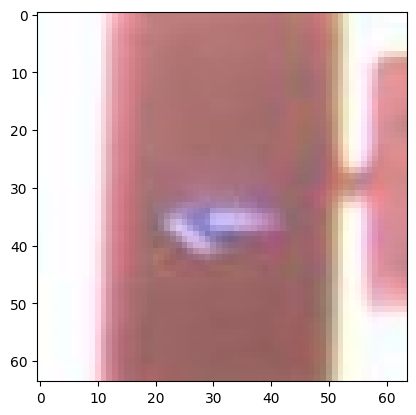

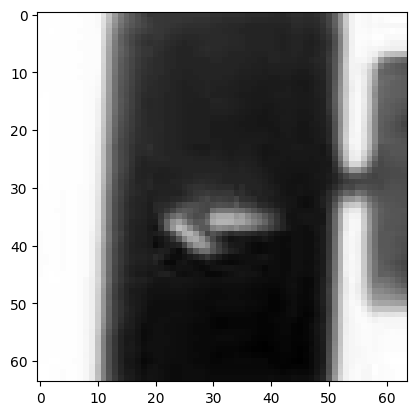

In [3]:
image_colour = cv2.imread(image_data['yellow-advance-left-traffic-light'][22])
image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
plt.figure()
plt.imshow(image_colour)

image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image_grey, cmap='gray')

(396,)
(64, 64)


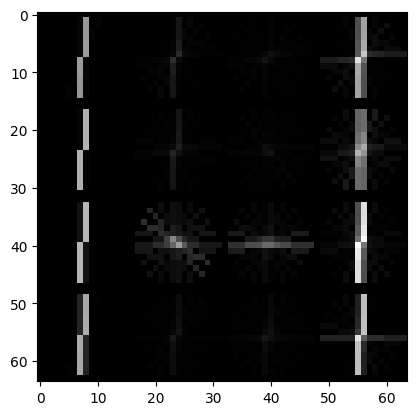

In [4]:
features, hog_image = hog(image_grey, 
                          orientations=11,
                          pixels_per_cell=(16, 16), 
                          cells_per_block=(2, 2),  
                          transform_sqrt=False,
                          visualize=True, 
                          feature_vector=True) #,block_norm='L2-Hys')

print(features.shape)
print(hog_image.shape)

plt.imshow(hog_image, cmap='gray')

In [5]:
X_hog_features = []
y_labels = []

for i, category in enumerate(categories):
    hog_accum = []
    for path in image_data[category]:
        image_colour = mpimg.imread(path)
        image_colour = cv2.resize(image_colour, (64, 64))  # Resize image to 64x64
        image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
        hog_feature, hog_img = hog(image_colour[:,:,0], 
                                   orientations=11,
                                   pixels_per_cell=(16, 16), 
                                   cells_per_block=(2, 2),  
                                   transform_sqrt=False,
                                   visualize=True, 
                                   feature_vector=True)
        hog_accum.append(hog_feature)
        y_labels.append(i)
    
    X_hog_features.extend(hog_accum)

X_hog_features = np.array(X_hog_features)
y_labels = np.array(y_labels)

print(f'HOG features shape: {X_hog_features.shape}')
print(f'Labels shape: {y_labels.shape}')

HOG features shape: (76526, 396)
Labels shape: (76526,)


In [6]:
X = X_hog_features
y = y_labels

print(f'Features shape: {X.shape}')
print(f'Labels shape: {y.shape}')

# Shuffle and split the data into training and testing sets
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Features shape: (76526, 396)
Labels shape: (76526,)


In [7]:
# model_training_time_label = 'SVM object classification training time: '

# # Record the time it takes to train the model
# start_time = time.time()

# # Create a LinearSVC SVM model and train it
# svc_model = LinearSVC(dual=False) # FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5.
# svc_model.fit(X_train, y_train)

# end_time = time.time()

# training_time = end_time - start_time

# # Output the training time into the file
# with open('..\\model-comparison-metrics', 'a') as f:
#     f.write(f'{model_training_time_label}{training_time}\n')

# print("Training time: {0}".format(training_time))


In [8]:
# model_prediction_time_label = 'SVM object classification prediction time: '

# # Record the prediction time
# start_time = time.time()

# y_predict = svc_model.predict(X_test)

# # Mark the end time for prediction
# end_time = time.time()

# # Calculate prediction time
# prediction_time = end_time - start_time

# # Output the prediction time into the file
# with open('model-comparison-metrics', 'a') as f:
#     f.write(f'{model_prediction_time_label}{prediction_time}\n')

# print("Prediction time: {0}".format(prediction_time))

In [9]:
# Create a confusion matrix in a heatmap and classification report and display them
# cm = confusion_matrix(y_test, y_predict)

# sns.heatmap(cm, annot=True, fmt='d')

# print(classification_report(y_test, y_predict))

# # Run predictions on 100 images and output the results
# Model_prediction = svc_model.predict(X_test[0:100])
# print(f'Model Predictions: {Model_prediction}')

# Model_TrueLabel = y_test[0:100]
# print(f'\nModel True Labels: {Model_TrueLabel}')

In [10]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
#param_grid = {'epochs': [1, 2]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=5, return_train_score=True)

model_training_time_label = 'SVM object classification training time: '

# Record the training time
start_time = time.time()

grid.fit(X_train, y_train)

# Get the best parameters and estimator
grid.best_params_
grid.best_estimator_

# Mark the end time for training
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Output the training time into the file
with open('..\\model-comparison-metrics', 'a') as f:
    f.write(f'{model_training_time_label}{training_time}\n')

print(grid.cv_results_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.789, test=0.766) total time=15.5min
[CV 2/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.791, test=0.771) total time=14.2min
[CV 3/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.789, test=0.770) total time=14.6min
[CV 4/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.789, test=0.772) total time=13.6min
[CV 5/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.789, test=0.766) total time=13.2min
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.776, test=0.767) total time= 7.2min
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.776, test=0.772) total time= 8.0min
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.775, test=0.777) total time= 7.5min
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.776, test=0.771) total time= 7.3min
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.775, test=0.769) total time= 7.5min

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2227
         1.0       0.98      0.98      0.98      2259
         2.0       0.93      0.86      0.89       165
         3.0       0.95      0.92      0.93       755
         4.0       0.99      0.98      0.99       138
         5.0       0.96      0.90      0.93       136
         6.0       0.92      0.91      0.92       266

    accuracy                           0.97      5946
   macro avg       0.96      0.93      0.94      5946
weighted avg       0.97      0.97      0.97      5946



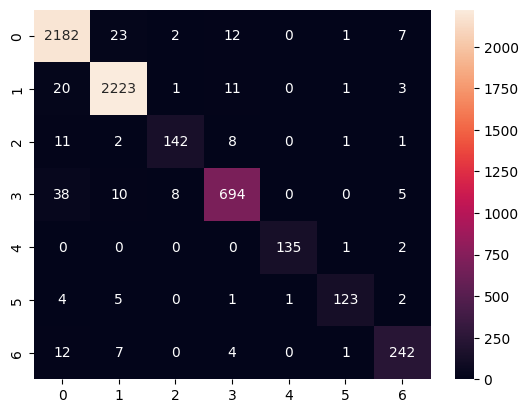

In [ ]:
model_prediction_time_label = 'SVM object classification prediction time: '

# Record the prediction time
start_time = time.time()
grid_predictions = grid.predict(X_test)
end_time = time.time()

# Calculate prediction time
prediction_time = end_time - start_time

# Output the prediction time into the file
with open('model-comparison-metrics', 'a') as f:
    f.write(f'{model_prediction_time_label}{prediction_time}\n')

print("Prediction time: {0}".format(prediction_time))

# Output the confusion matrix as a heatmap and the classification report
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, grid_predictions))

In [ ]:
model_path = '..\\saved-models\\object-classifcation-svm.pkl'  # replace with path to model
model_path2 = '..\\saved-models\\object-classifcation-svm2.pkl'  # replace with path to model

dump(grid, model_path) # Save the model
#grid = load(model_path)

# save
with open(model_path2,'wb') as f:
    pickle.dump(grid,f)

# load
with open(model_path2, 'rb') as f:
    model = pickle.load(f)

In [ ]:
def svmDetector(image):
    image = image.astype(np.float32)/255

    h_start = 0
    h_stop = image.shape[0]

    pixels_in_cell = 16
    HOG_orientations = 11
    cells_in_block = 2
    cells_in_step = 3

    masked_region = image[h_start:h_stop,:,:]

    resizing_factor = 1.7
    masked_region_shape = masked_region.shape
    L = masked_region_shape[1]/resizing_factor
    W = masked_region_shape[0]/resizing_factor

    masked_region_resized = cv2.resize(masked_region, (int(L), int(W)))
    masked_region_resized_R = masked_region_resized[:,:,0]
 
    masked_region_hog_feature_all, hog_image = hog(masked_region_resized_R, 
                                        orientations=HOG_orientations,
                                        pixels_per_cell=(pixels_in_cell, pixels_in_cell), 
                                        cells_per_block=(cells_in_block, cells_in_block),  
                                        transform_sqrt=False,
                                        visualize=True, 
                                        feature_vector=False)

    n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1
    n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

    #nfeat_per_block = orientations * cells_in_block **2
    blocks_in_window = (64 // pixels_in_cell)-1

    steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
    steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

    rectangles_found = []

    for x_blocks in range(steps_x):
        for y_blocks in range(steps_y):
            y_position = y_blocks * cells_in_step
            x_position = x_blocks * cells_in_step

            hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
            x_left = x_position * pixels_in_cell
            y_top = y_position * pixels_in_cell
          

            # predict using trained SVM
            #test_prediction = svc_model.predict(hog_feat_sample.reshape(1, -1)) # Basic SVM
            test_prediction = grid.predict(hog_feat_sample.reshape(1, -1))

            if test_prediction == 1:
                rectangle_x_left = int(x_left * resizing_factor)
                rectangle_y_top = int(y_top * resizing_factor)
                window_dim = int(64 * resizing_factor)
                rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start), (rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))

    print(f'Location of Cars Found: {rectangles_found}')

    
    # plt.figure()
    
    # plt.imshow(Image_with_Rectangles)
    return rectangles_found

#test_image = mpimg.imread('Datasets/CarND-Vehicle-Detection-master/test_images/test1.jpg')


In [ ]:
import cv2

def process_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    # Get the video frame width, height, and FPS
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    counter = 0

    while cap.isOpened():
        counter += 1
        print(f'Frame {counter}')

        ret, frame = cap.read()
        if not ret:
            break
        
        # Get bounding boxes for the current frame
        rectangles = svmDetector(frame)

        # Draw rectangles on the frame
        if rectangles != None:
            for rect in rectangles:
                
                top_left = tuple(rect[0])
                bottom_right = tuple(rect[1])
                cv2.rectangle(frame, top_left, bottom_right, (255, 0, 0), -1)  # Draw rectangle
                


        # Write the frame with rectangles to the output video
        out.write(frame)

        # Also display the frame if you want to see it in real-time
       
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release everything when done
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
process_video('TestSets/Videos/highway2.mp4', 'output.mp4')

Frame 1
Location of Cars Found: [((163, 244), (271, 352)), ((326, 0), (434, 108)), ((489, 163), (597, 271)), ((489, 326), (597, 434)), ((816, 163), (924, 271)), ((816, 244), (924, 352)), ((897, 163), (1005, 271)), ((897, 244), (1005, 352)), ((897, 571), (1005, 679)), ((1060, 489), (1168, 597)), ((1142, 163), (1250, 271)), ((1142, 326), (1250, 434))]
Frame 2
Location of Cars Found: [((81, 0), (189, 108)), ((81, 163), (189, 271)), ((163, 81), (271, 189)), ((163, 244), (271, 352)), ((489, 163), (597, 271)), ((489, 326), (597, 434)), ((571, 0), (679, 108)), ((571, 163), (679, 271)), ((734, 489), (842, 597)), ((816, 163), (924, 271)), ((816, 571), (924, 679)), ((897, 244), (1005, 352)), ((897, 571), (1005, 679)), ((1060, 489), (1168, 597)), ((1142, 163), (1250, 271))]
Frame 3
Location of Cars Found: [((0, 81), (108, 189)), ((81, 163), (189, 271)), ((163, 81), (271, 189)), ((163, 244), (271, 352)), ((244, 571), (352, 679)), ((326, 571), (434, 679)), ((408, 81), (516, 189)), ((489, 163), (597

  Ali


#